In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
display(HTML("<style>.container { font-weight: bold !important;}</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

# model validation 평가지표

## accuracy

 - $\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)$
 
 - $\frac {True Positive + True Negative} { Positive + Negative} $
 
 ## confusion matrix
 
 - classification model의 결과를 크게 4가지로 나누어 살펴보자.
 - True Positive: 모델이 true라고 분류한 것이 실제로도 true인 경우.채택한 귀무가설이 실제로도 참인 경우.
 - False Positive: 모델이 true라고 분류한 것이 실제로는 false인 경우.채택한 귀무가설이 실제로는 거짓인 경우. (type 2 error, overestimation)
 - False Negative: 모델이 False라고 분류했지만, 실제로는 true인 경우. 기각한 귀무가설이 실제로는 참인경우 (type 1 error, underestimation)
 - True Negative: 모델이 Flase라고 분류했고, 실제로도 False인 경우. 기각한 귀무가설이 실제로도 거짓인 경우.
 <br>
<img src='https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg' width='60%'>
 
## Recall and Precision
 - Recall : $ \frac{True Positive}{False Positive + True Positive}$
 - Precision : $ \frac{True Positive}{True Negative + True Positive}$
 - recall과 precision은 tradeoff 관계이다. 
 
## F1 score(F-measure)
  - accuracy는 분류 클래스가 imbalanced하면, 모델을 평가하는데 유효한 지표로 사용할 수 없다. 따라서 f1 score를 사용한다.
  - $ 2* \frac{precision * recall}{precision + recall}$
  - F1 score는 recall과 precision의 조화평균이다. 
  - F1 score는 recall과 precision이 어느 한편으로 치우져지지 않았을때 높아진다. 이를 시각화 한 그래프가 ROC curve이다.
  
## ROC(Receiver operation characteristric curve) 곡선과 AUC(Area Under Curve)
- ROC 곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지 나타내는 곡선
- AUC(Area Under Curve) 값은 ROC 곡선 밑에 면적을 구한 값 (1이 가까울수록 좋은 값)

## 이진분류 - titanic 인 경우 테스트 

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
titanic_df = pd.read_csv("~/dropbox/python숙달/data/titanic_book.csv")
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [5]:
encoder = LabelEncoder()
encoder.fit(titanic_df.Sex)
titanic_df.Sex = encoder.transform(titanic_df.Sex)


encoder.fit(titanic_df['Embarked'])
titanic_df['Embarked'] = encoder.transform(titanic_df['Embarked']).reshape(-1, 1)

In [6]:

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
encoder.fit(titanic_df['Cabin'])
titanic_df['Cabin']  = encoder.transform(titanic_df['Cabin']).reshape(-1, 1)

In [7]:
titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [8]:
X_titanic_df = titanic_df.loc[:, 'Pclass':]
y_titanic_df = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, 
                                                    test_size=0.2, random_state=11)

model_kn = KNeighborsClassifier(n_neighbors=3)
model_kn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
model_kn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

# 정확도 평가지표 사용해보기.

## accuracy

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model_kn.predict(X_test))

0.7150837988826816

## 오차행렬(Confusion Matrix)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
confusion_matrix(y_test, model_kn.predict(X_test))

array([[99, 19],
       [32, 29]], dtype=int64)

In [12]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

Text(19.82, 0.5, 'Actual')

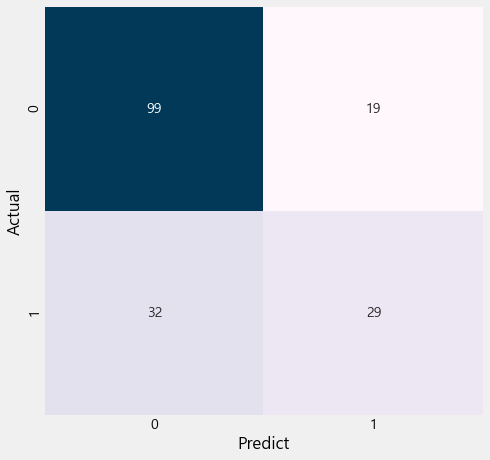

In [13]:
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix(y_test, model_kn.predict(X_test)),
           annot = True, cmap = "PuBu", cbar = False)
plt.xlabel('Predict')
plt.ylabel('Actual')


In [14]:
# accuracy: (TP + TN) / (TN + FP +FN +TP)
confmat = confusion_matrix(y_test, model_kn.predict(X_test))
print(accuracy_score, model_kn.predict(X_test))
(confmat[0,0] + confmat[1,1]) / (confmat[0,0] + confmat[0,1] + confmat[1,0] + confmat[1,1])

<function accuracy_score at 0x0000016683516310> [0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1
 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1]


0.7150837988826816

In [15]:
# 오류율 = (FN + FP) / (TN + FP + FN + TP)
print(mean_squared_error(y_test, model_kn.predict(X_test)))
(confmat[0,1] + confmat[1,0]) / (confmat[0,0] + confmat[0,1] + confmat[1,0] + confmat[1,1])

0.2849162011173184


0.2849162011173184

### 정밀도(Precision) 과 재현율(Recall)

- 정밀도는 예측을 Positive로 한 대상 중에 예측과 실제값이 Positive로 일치한 데이터의 비율이다. 
- 재현율은 실제값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율이다. 


```
from sklearn.metrics import accuracy_score, precision_score , recall_score

precision_score(y_test, 모델명.predict(X_test))
recall_score(y_test, 모델명.predict(X_test)))


confusion_matrix(y_test, 모델명.predict(X_test)) 기준

정밀도 = TP / (FP + TP)
재현율 = TP / (FN + TP)

```


##  정밀도/재현율 트레이드오프 (Precision/Recall Trade-off)

- 정밀도와 재현율은 상호보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 높이면 다른 하나의 수치는 떨어지기쉽다. 
<br> 이를 정밀도/재현율의 트레이드(Trade Off) 라고 한다. 

- 가장 좋은 성능 평가는 재현율과 정밀도 모두 높은 수치를 얻는 것이다. 

- 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다. 
    - 예) 암진단, 금융사기 판별


- 정밀도가 중요 지표인 경우의 예는 스팸메일 여부를 판단하는 모델의 경우. 실제 Positive인 스팸 메일을 Negative인 일반 메일로 분류하여, 사용자가 불편함을 느끼는 정도이지만 실제 Negative 인 일반 메일을 Positive인 스팸 메일로 분류하여 메일을 아예받지 못하는 경우가 있다 
    - 예) 스팸메일 


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score , recall_score, f1_score 

# 오차행렬 생성 
confmat = confusion_matrix(y_test, model_kn.predict(X_test))

print("정밀도:", precision_score(y_test, model_kn.predict(X_test)))
print("재현율:", recall_score(y_test, model_kn.predict(X_test)))

# Confusion Matrix에 적용 : TP / (FP + TP)
print("\n\n정밀도:", (confmat[1,1] / (confmat[0,1] + confmat[1,1])))

# Confusion Matrix에 적용 : FN / (FP + TP)
print("재현율:", (confmat[1,1] / (confmat[1,0] + confmat[1,1])))

정밀도: 0.6041666666666666
재현율: 0.47540983606557374


정밀도: 0.6041666666666666
재현율: 0.47540983606557374


## f1score
```
from sklearn.metrics import f1_score 

f1_score(y_test , 모델명.predict(X_test))

```

In [17]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, model_kn.predict(X_test))
print(f'F1 스코어: {f1:.4f}')

F1 스코어: 0.5321


# classification_report()

- accuracy, precision , recall , f1-score 함께 표시 


```
from sklearn.metrics import classification_report

classification_report(y_test , 모델명.predict(X_test))

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_kn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       118
           1       0.60      0.48      0.53        61

    accuracy                           0.72       179
   macro avg       0.68      0.66      0.66       179
weighted avg       0.70      0.72      0.71       179



# ROC curve와 AUC


## ROC curve
- ROC Curve는 False positive rate가 변화할 때, True Positive rate가 어떻게 변화하는지 보여준다.

- TPR(True Positive Rate, Recall): True Positive/(False Negative + True Positive)
- TNR(True Negative Rate): True Negative /(True Negative + False Positive)
- FPR(False Positive Rate): False Positive / (False Positive + True Negative), 1 - TNR

from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)

## AUC graph

- AUC 값은 roc 곡선 밑의 면적을 의미한다. 1에 가까울 수록 좋다.

from sklearn.metrics import roc_score

- 양성 클레스일때의 확률을 구한 우에 roc_auc_score(y_test, 양성 클래스일때의 확률)
pred_proba_class1 = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, pred_proba_class1)



In [19]:
from matplotlib import style
style.use('ggplot')

roc_auc_score 0.7420116699083078


(0.0, 1.0)

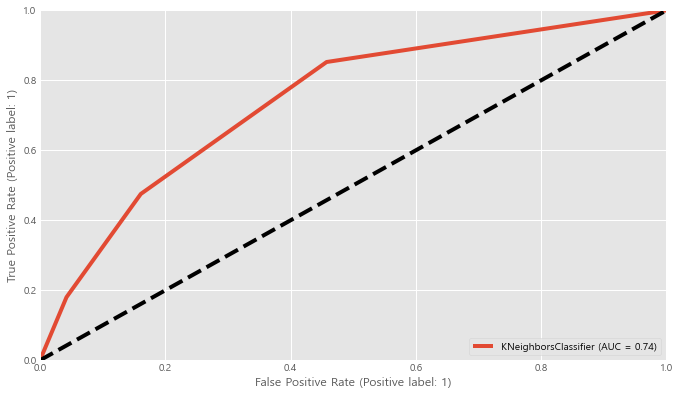

In [20]:
from sklearn.metrics import plot_roc_curve, roc_auc_score

pred_proba_class1 = model_kn.predict_proba(X_test)[:, 1]

pred_proba_class1 = model_kn.predict_proba(X_test)[:, 1]
print('roc_auc_score', roc_auc_score(y_test, pred_proba_class1))
plot_roc_curve(model_kn, X_test, y_test)
plt.plot([0,1], [0,1], '--k', label='Random')
# plt.xticks(np.round(np.arange(start, end, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)

# Quiz

- 타이타닉 데이타셋에 아래의 소스를 참조하여 모델을 다시 생성하고 F1 score, 재현율, 정밀도 등을 출력하여라. 

```
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
```

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

titanic_df = pd.read_csv('~/dropbox/python숙달/data/titanic_book.csv')

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)


encoder = LabelEncoder()
encoder.fit(titanic_df['Sex'])
temp = encoder.transform(titanic_df['Sex'])
titanic_df['Sex'] = temp.reshape(-1, 1)

encoder.fit(titanic_df['Embarked'])
temp = encoder.transform(titanic_df['Embarked'])
titanic_df['Embarked'] = temp.reshape(-1, 1)

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
encoder.fit(titanic_df['Cabin'])
temp = encoder.transform(titanic_df['Cabin'])
titanic_df['Cabin'] = temp.reshape(-1, 1)


titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [22]:
y = titanic_df.iloc[:,:1]
X = titanic_df.iloc[:,1:]

In [23]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 11, stratify = y)

ranfo = RandomForestClassifier()
ranfo.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = ranfo.predict(X_test)

In [26]:
y_test['Survived']

605    0
37     0
769    0
67     0
319    1
      ..
495    0
44     1
452    0
68     1
467    0
Name: Survived, Length: 268, dtype: int64

In [36]:
print(classification_report(y_test, ranfo.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       165
           1       0.78      0.78      0.78       103

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



roc_auc_score 0.8679317446307737


(0.0, 1.0)

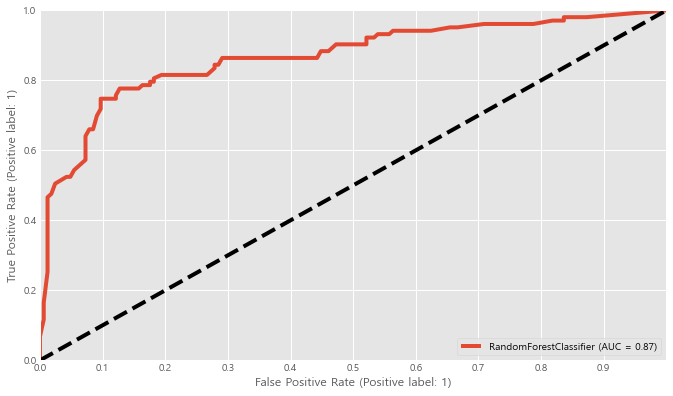

In [38]:
pred_proba_class1 = ranfo.predict_proba(X_test)[:, 1]
print('roc_auc_score', roc_auc_score(y_test, pred_proba_class1))
plot_roc_curve(ranfo, X_test, y_test)

plt.plot([0,1], [0,1], '--k', label='Random')

plt.xticks(np.round(np.arange(0, 1, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)

roc_auc_score 0.8895263312739042


(0.0, 1.0)

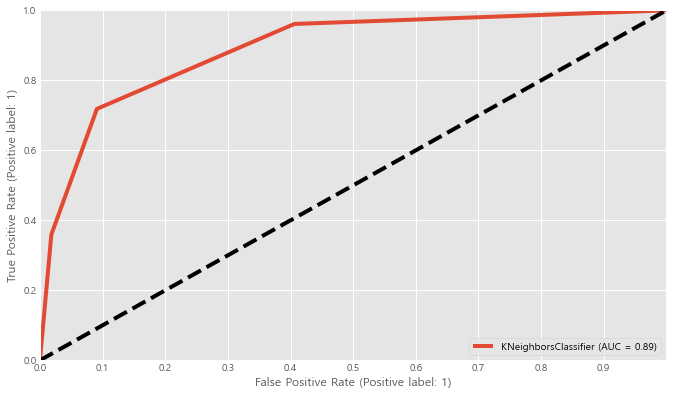

In [39]:
# KNN인 경우 
pred_proba_class1 = model_kn.predict_proba(X_test)[:, 1]
print('roc_auc_score', roc_auc_score(y_test, pred_proba_class1))
plot_roc_curve(model_kn, X_test, y_test)
plt.plot([0,1], [0,1], '--k', label='Random')
plt.xticks(np.round(np.arange(0, 1, 0.1), 2))
plt.xlim(0,1)
plt.ylim(0,1)